In [ ]:
!pip install diffusers transformers accelerate --upgrade
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
!pip install torchvision

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

prompt = "A cinematic shot of a baby racoon wearing an intricate italian priest robe."
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

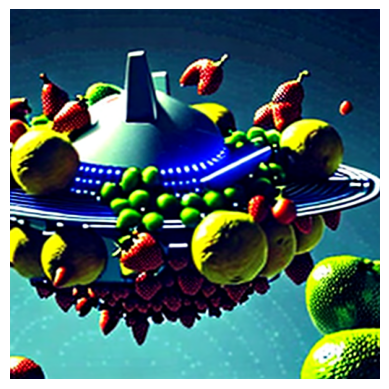

In [ ]:
#@title STEP 3: Example Prompt
prompt = "a futuristic spaceship made of fruits, concept art, 4k" #@param {type:"string"}
image = pipe(prompt).images[0]
filename_output = "output.png" #@param {type:"string"}

# Save result image
image.save(filename_output)

import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!pip install streamlit pyngrok

In [ ]:
#@title STEP 4: Write app.py for Stable Diffusion simple web using streamlit
%%writefile app.py
import streamlit as st
from diffusers import AutoPipelineForText2Image
import torch
from PIL import Image

st.set_page_config(page_title="SD-Turbo WebUI", layout="centered")

@st.cache_resource
def load_model():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    dtype = torch.float16 if device == "cuda" else torch.float32

    pipe = pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=dtype, variant="fp16")
    pipe.to(device)

    return pipe, device

pipe, device = load_model()

st.title("🖼️ Stable Diffusion Turbo WebUI")
prompt = st.text_input("Enter a prompt:", "a fantasy castle floating in the sky")

if st.button("Generate"):
    with st.spinner("Generating image..."):
        image = pipe(prompt).images[0]
        st.image(image, caption=prompt)

Writing app.py


In [ ]:
#@title STEP 5: streamlit + ngrok running for Stable Diffusion Simple Web
from pyngrok import ngrok
import os

NGROK_AUTH_TOKEN = "YOUR_NGROK_AUTHTOKEN" #@param {type:"string"}
os.environ["NGROK_AUTH_TOKEN"] = NGROK_AUTH_TOKEN

!ngrok authtoken $NGROK_AUTH_TOKEN

# Hentikan ngrok sebelumnya
ngrok.kill()

# Jalankan streamlit di background
!nohup streamlit run app.py --server.port 8501 > /dev/null 2>&1 &

# Ngrok forwarding
public_url = ngrok.connect(8501)
print("🌐 Web UI:", public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌐 Web UI: NgrokTunnel: "https://1637-35-240-210-71.ngrok-free.app" -> "http://localhost:8501"
